## Numpy and Matplotlib basics
- Create Numpy array
- Make operations with Numpy array
- Show basics graphs with Matplotlib

In [1]:
import csv
import numpy as np
my_list = []
with open('data/demographics.csv', 'r') as f:
    reader = csv.reader(f, delimiter=';')
    my_list = list(reader)
demographics = np.array(my_list)
demographics

array([['Country', 'Region', 'GDP per capita', ..., '2011', '2012', '2013'],
       ['Albania', 'Europe & Central Asia', '1965.70723', ..., '2904780',
        '2900489', '2897366'],
       ['Algeria', 'Middle East & North Africa', '2255.225482', ...,
        '36717132', '37439427', '38186135'],
       ..., 
       ['Vietnam', 'East Asia & Pacific', '757.4009286', ..., '87840000',
        '88772900', '89708900'],
       ['Zambia', 'Sub-Saharan Africa', '443.9206307', ..., '14343526',
        '14786581', '15246086'],
       ['Zimbabwe', 'Sub-Saharan Africa', '347.7456605', ..., '14255592',
        '14565482', '14898092']], 
      dtype='<U30')

In [2]:
countries = demographics[1:,0:1]
years = demographics[0,4:]
# XXX fix the (A, ) array to (A, 1) shape
years = years[:,np.newaxis]
regions = demographics[1:,1]


# Population growth
population_brazil = demographics[19,4:].astype(np.uint32)
population_brazil = population_brazil[:,np.newaxis]
population_usa = demographics[152,4:].astype(np.uint32)
population_usa = population_usa[:,np.newaxis]

# Population/Life expectancy/GDP per capita in countries
life_exp = demographics[1:,3:4].astype(np.float)
population = demographics[1:,-1].astype(np.uint32)
population = population[:,np.newaxis]
gdp_pc = demographics[1:,2:3].astype(np.float)

In [3]:
# show mean Life expectancy among countries (in millions)
np.mean(life_exp)

72.239810126582285

In [4]:
# show standard deviation of life expectancy among all countries (in millions)
np.std(life_exp)

7.8489010334124174

In [5]:
# multiplying np arrays
conversion = np.array([0.000001])
population_brazil_in_millions = population_brazil * conversion
population_usa_in_millions = population_usa * conversion
population_in_millions = population * conversion
population_in_millions = population_in_millions.astype(np.float)
population_usa

array([[180671000],
       [183691000],
       [186538000],
       [189242000],
       [191889000],
       [194303000],
       [196560000],
       [198712000],
       [200706000],
       [202677000],
       [205052000],
       [207661000],
       [209896000],
       [211909000],
       [213854000],
       [215973000],
       [218035000],
       [220239000],
       [222585000],
       [225055000],
       [227225000],
       [229466000],
       [231664000],
       [233792000],
       [235825000],
       [237924000],
       [240133000],
       [242289000],
       [244499000],
       [246819000],
       [249623000],
       [252981000],
       [256514000],
       [259919000],
       [263126000],
       [266278000],
       [269394000],
       [272657000],
       [275854000],
       [279040000],
       [282162411],
       [284968955],
       [287625193],
       [290107933],
       [292805298],
       [295516599],
       [298379912],
       [301231207],
       [304093966],
       [306771529],


In [6]:
# get countries had more than 200 million people in 2013
np.array([countries[population_in_millions > 200], 
          population_in_millions[population_in_millions > 200]])

array([['Brazil', 'China', 'India', 'Indonesia', 'United States'],
       ['204.259377', '1357.3799999999999', '1279.498874', '251.268276',
        '316.497531']], 
      dtype='<U32')

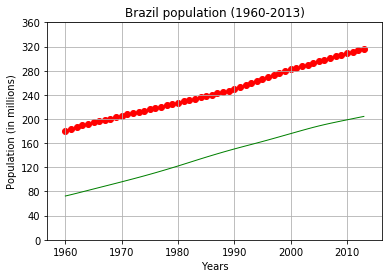

In [7]:
import matplotlib.pyplot as plt
plt.plot(years, population_brazil_in_millions, color='green', linewidth=1)
plt.scatter(years, population_usa_in_millions, color='red', linewidth=1)
plt.ylabel('Population (in millions)')
plt.xlabel('Years')
plt.title('Brazil population ('+years[0][0]+'-'+years[-1][0]+')')
plt.yticks(range(0,400,40))
plt.grid(True)
plt.show()

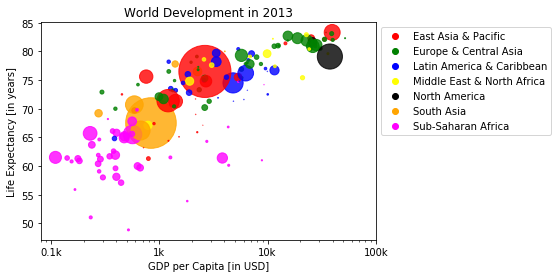

In [8]:
# Clear plot area
plt.clf()

# Regions in the world
unique_regions = list(np.unique(regions))
all_colors = ['red', 'green', 'blue', 'yellow', 'black', 'orange', 'magenta']

dict_colors = dict(zip(unique_regions, all_colors))

contries_colors = [dict_colors[region] for region in regions]

# c is colors, s is size of points
plt.scatter(gdp_pc, life_exp, s = population_in_millions * 2, c = contries_colors, alpha = 0.8)

# Previous customizations
plt.xscale('log') 
plt.xlabel('GDP per Capita [in USD]')
plt.ylabel('Life Expectancy [in years]')
plt.title('World Development in '+years[-1][0])
plt.xticks([100, 1000, 10000, 100000],['0.1k', '1k', '10k', '100k'])
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in all_colors]
plt.legend(markers, unique_regions, numpoints=1,loc='upper left', bbox_to_anchor=(1,1))

# Display the plot
plt.show()